# Pushkal Ojha
# 220968422
# Batch : A2 
# Section : A

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset 

In [2]:
df = pd.read_csv(r'C:\Users\push2\Desktop\ML Lab\forest+fires\forestfires.csv')

In [3]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


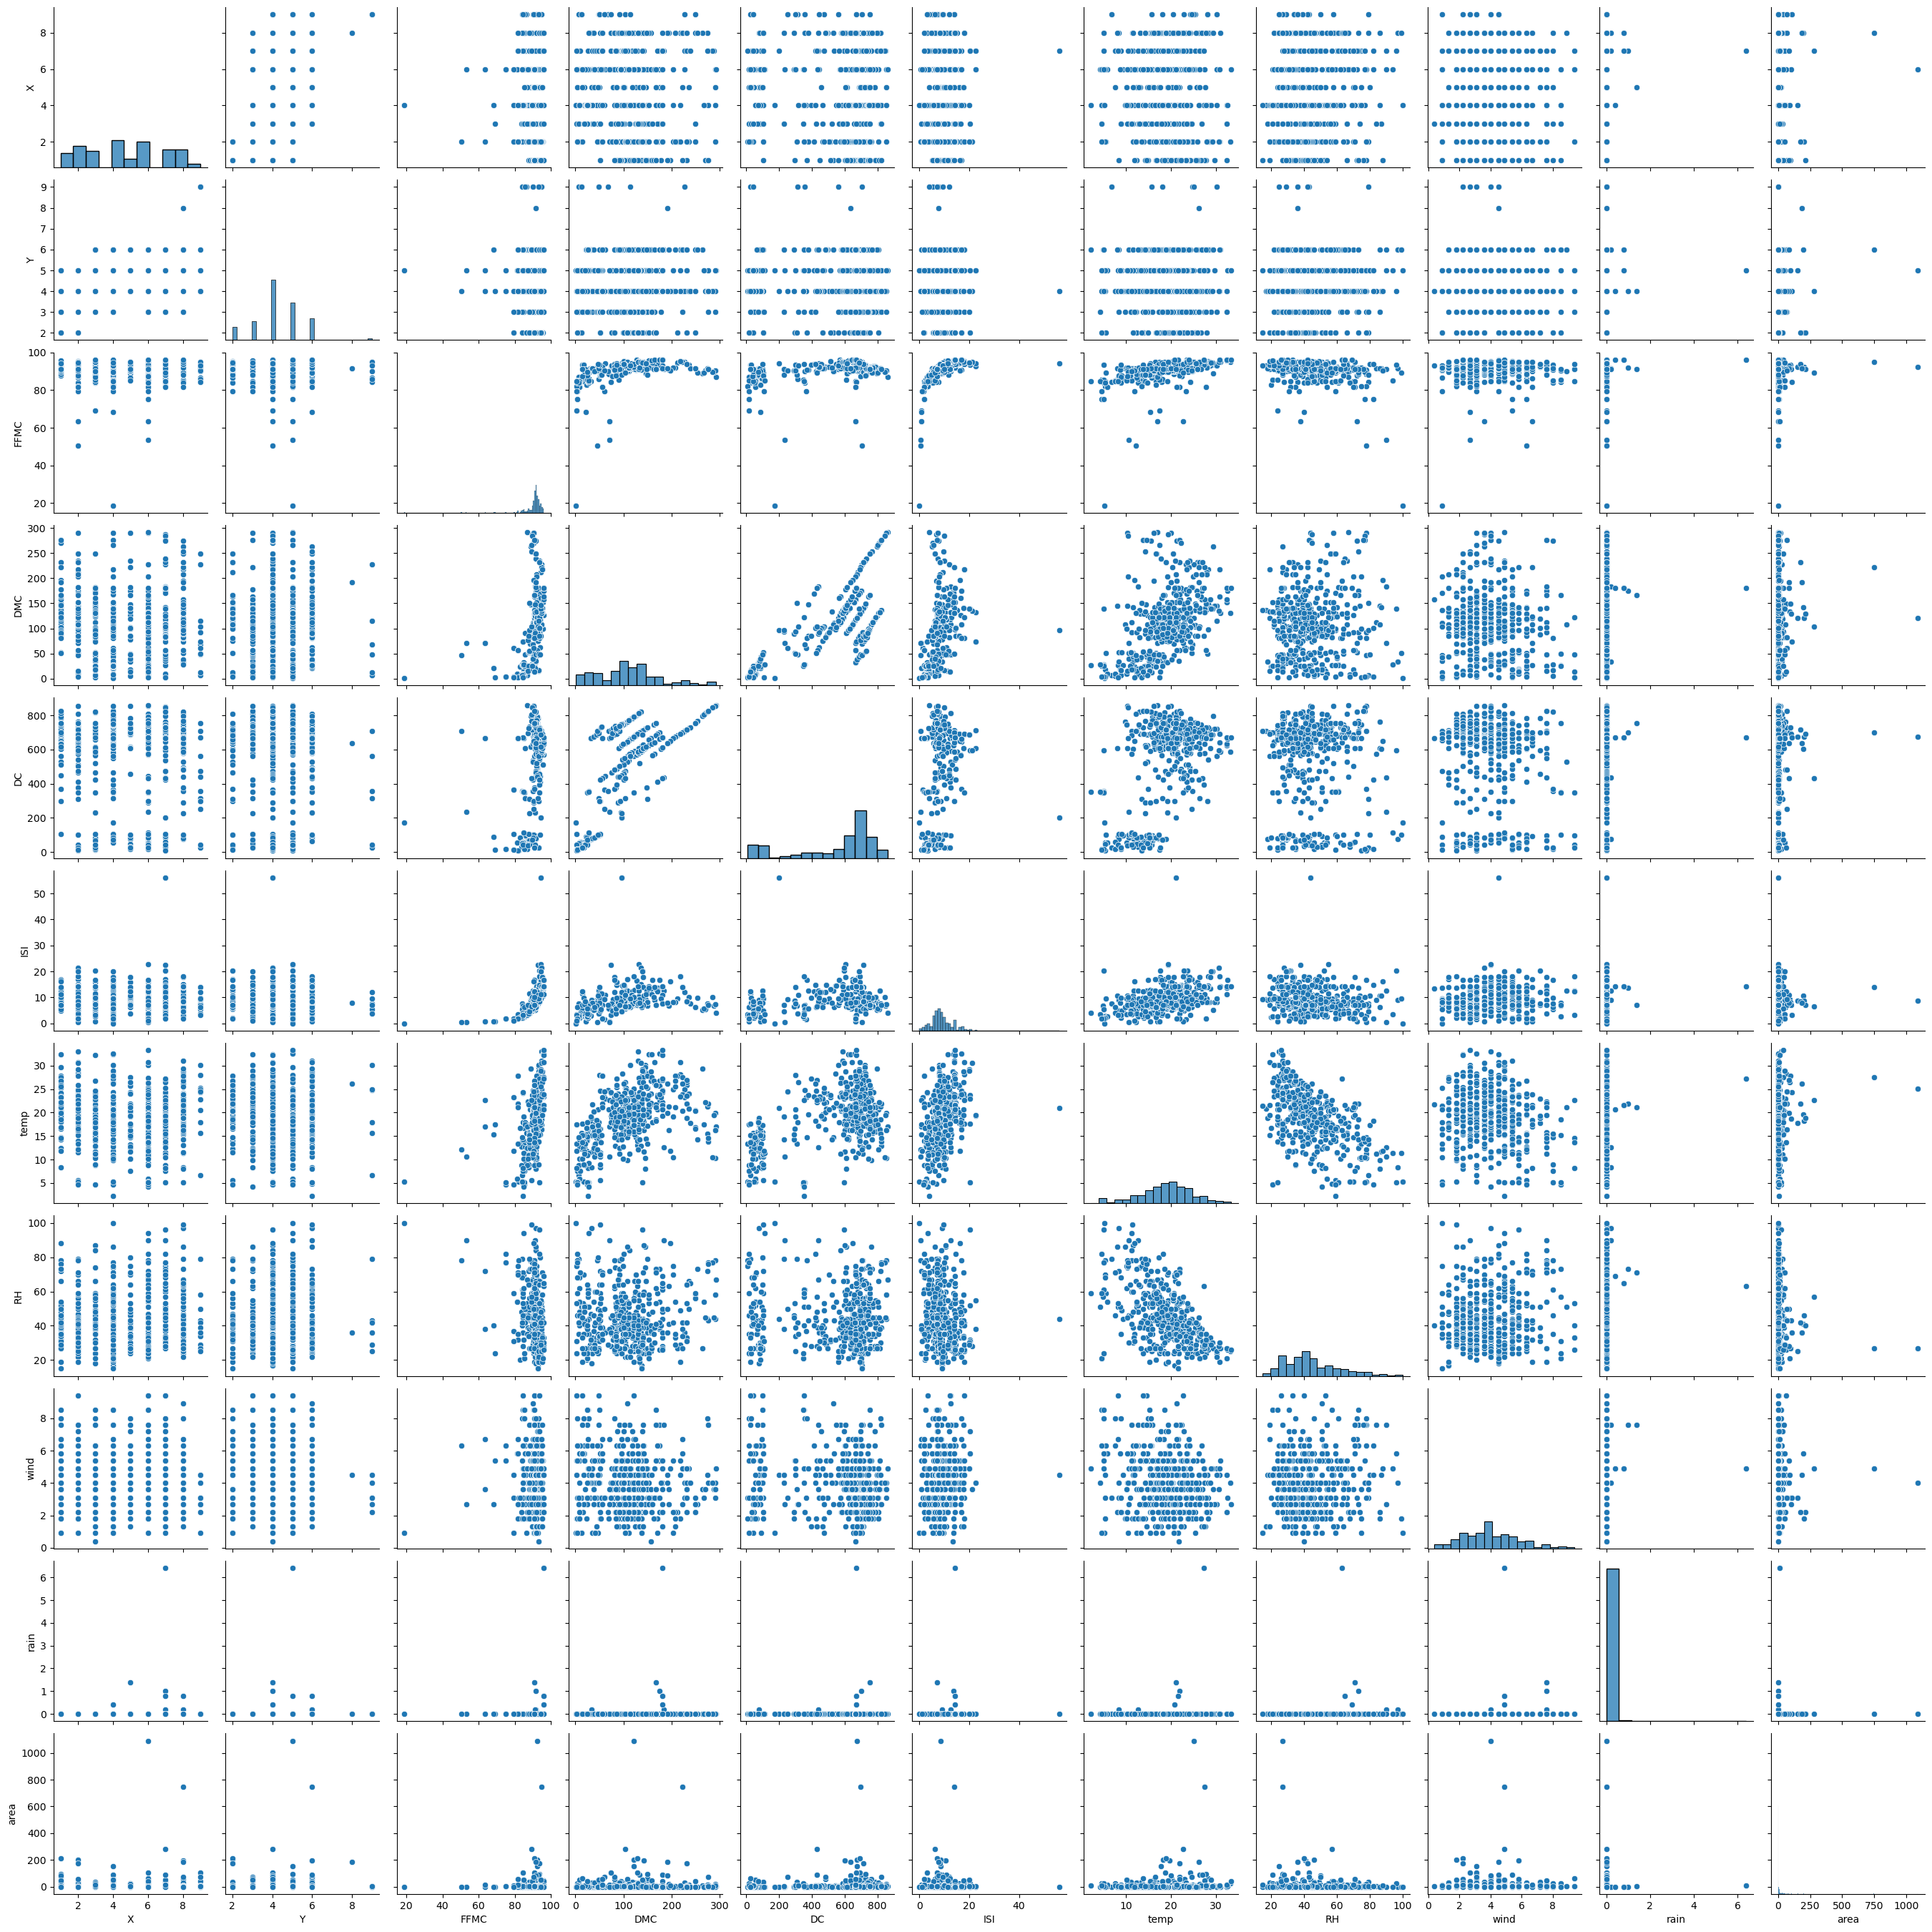

In [4]:
sns.pairplot(df)
plt.show()

## Pre-processing dataset

In [22]:
df.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


### Note: Days wont affect the fires in any way so I am dropping the column

In [23]:
df.drop(columns = 'day',inplace = True)

In [24]:
df

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Note: Encoding the month column as months do affect the tempereture and weather for the forest fires to occur

In [25]:
df_encoded = pd.get_dummies(df , columns = ['month'])

In [26]:
df_encoded

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          517 non-null    int64  
 1   Y          517 non-null    int64  
 2   FFMC       517 non-null    float64
 3   DMC        517 non-null    float64
 4   DC         517 non-null    float64
 5   ISI        517 non-null    float64
 6   temp       517 non-null    float64
 7   RH         517 non-null    int64  
 8   wind       517 non-null    float64
 9   rain       517 non-null    float64
 10  area       517 non-null    float64
 11  month_apr  517 non-null    uint8  
 12  month_aug  517 non-null    uint8  
 13  month_dec  517 non-null    uint8  
 14  month_feb  517 non-null    uint8  
 15  month_jan  517 non-null    uint8  
 16  month_jul  517 non-null    uint8  
 17  month_jun  517 non-null    uint8  
 18  month_mar  517 non-null    uint8  
 19  month_may  517 non-null    uint8  
 20  month_nov 

In [28]:
def outlier_det(df,col):
    Q1 = np.percentile(df[col],25)
    Q3 = np.percentile(df[col],75)
    
    IQR = Q3-Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    outliers = (df[col]<lower)|(df[col]>upper)
    return outliers

In [29]:
def outlier_rep(df,col):
    Q1 = np.percentile(df[col],25)
    Q3 = np.percentile(df[col],75)
    
    IQR = Q3-Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    outliers = (df[col]<lower)|(df[col]>upper)
    df.loc[outliers,col] = np.mean(df[col])

In [30]:
df_encoded.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df_encoded.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

In [32]:
cols = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep']
for col in cols:
    outliers = outlier_det(df_encoded,col)
    print(f"Columns{col}")
    print(df_encoded[outliers])

ColumnsX
Empty DataFrame
Columns: [X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area, month_apr, month_aug, month_dec, month_feb, month_jan, month_jul, month_jun, month_mar, month_may, month_nov, month_oct, month_sep]
Index: []

[0 rows x 23 columns]
ColumnsY
     X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  month_dec  \
58   2  2  84.0    9.3   34.0   2.1  13.9  40   5.4   0.0  ...          0   
59   2  2  86.6   13.2   43.0   5.3  12.3  51   0.9   0.0  ...          0   
60   2  2  89.3   51.3  102.2   9.6  11.5  39   5.8   0.0  ...          0   
61   2  2  89.3   51.3  102.2   9.6   5.5  59   6.3   0.0  ...          0   
62   2  2  93.0   75.3  466.6   7.7  18.8  35   4.9   0.0  ...          0   
63   2  2  90.2   99.6  631.2   6.3  20.8  33   2.7   0.0  ...          0   
64   2  2  91.1  103.2  638.8   5.8  23.1  31   3.1   0.0  ...          0   
65   2  2  91.7  114.3  661.3   6.3  18.6  44   4.5   0.0  ...          0   
66   2  2  92.4  117.9  668.0  12.2  23.0  3

Columnsmonth_jun
     X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  month_dec  \
22   7  4  94.3   96.3  200.0  56.1  21.0  44   4.5   0.0  ...          0   
150  6  5  92.5   56.4  433.3   7.1  23.2  39   5.4   0.0  ...          0   
295  7  5  93.1  180.4  430.8  11.0  22.2  48   1.3   0.0  ...          0   
296  6  4  90.4   89.5  290.8   6.4  14.3  46   1.8   0.0  ...          0   
297  8  6  90.4   89.5  290.8   6.4  15.4  45   2.2   0.0  ...          0   
298  8  6  91.2  147.8  377.2  12.7  19.6  43   4.9   0.0  ...          0   
299  6  5  53.4   71.0  233.8   0.4  10.6  90   2.7   0.0  ...          0   
300  6  5  90.4   93.3  298.1   7.5  20.7  25   4.9   0.0  ...          0   
301  6  5  90.4   93.3  298.1   7.5  19.1  39   5.4   0.0  ...          0   
302  3  6  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...          0   
303  3  6  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...          0   
399  9  5  93.3   49.5  297.7  14.0  28.0  34   4.5   0.0  

In [33]:
cols = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep']
for col in cols:
    outlier_rep(df_encoded,col)

## Making Model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Note: Area is our target column

In [36]:
X = df_encoded[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep']]
y = df_encoded['area']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [38]:
ff_lr = LinearRegression()

In [40]:
ff_lr.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred = ff_lr.predict(X_test)

In [50]:
pd.DataFrame(y_pred,y_test)

,0
area,
0.00,43.643378
0.00,-0.581744
1.23,39.204076
1.46,5.203846
1.95,10.167299
...,...
2.51,13.962328
5.38,10.400911
2.17,-1.464513


## Mean Squared Error

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
mse = mean_squared_error(y_test,y_pred)

In [44]:
mse

11692.734365410568